In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('train.csv')

In [4]:
data.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [9]:
data['len']=data['text'].apply(len)

In [10]:
data.head()

,id,keyword,location,text,target,len
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,69
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,38
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,133
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,65
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,88


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7faa28f863d0>,
      dtype=object)

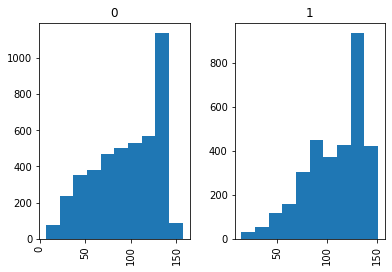

In [13]:
data.hist(column = 'len' , by = 'target')

In [65]:
data = data.fillna('')

In [75]:
X = data['keyword']+ data['location'] + data['text']

In [76]:
y = data['target']

In [85]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC

In [129]:
from sklearn.linear_model import LogisticRegression

In [130]:
#lets create a pipeline 
from sklearn.pipeline import Pipeline

model_lsvc = Pipeline([
    ('tfv' , TfidfVectorizer(min_df=3 , max_features=None ,
                      strip_accents='unicode' , analyzer = 'word' , 
                      token_pattern=r'\w{1,}', ngram_range=(1,3) , 
                      stop_words='english')),  # integer counts to weighted TF-IDF scores
    ('classifier', LogisticRegression()),  # train on TF-IDF vectors w/ Rf classifier`
])


In [97]:
from sklearn.model_selection import train_test_split

In [131]:
X_train , X_test , y_train , y_test  = train_test_split(X , y , test_size = 0.20)

In [132]:
#lets feed our model with training set(this may take a while...)
model_lsvc.fit(X_train , y_train)

/home/saurabh/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Pipeline(memory=None,
         steps=[('tfv',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=3, ngram_range=(1, 3), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words='english', strip_accents='unicode',
                                 sublinear_tf=False, token_pattern='\\w{1,}',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('classifier',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                        

In [136]:
# lets now predict the target class for test set
prediction = model_lsvc.predict(X_test)

In [137]:
#Evaluating model performance
from sklearn.metrics import classification_report , accuracy_score

In [138]:
print(classification_report(y_test , prediction))
print(accuracy_score(y_test , prediction))

              precision    recall  f1-score   support

           0       0.78      0.86      0.82       872
           1       0.78      0.67      0.72       651

    accuracy                           0.78      1523
   macro avg       0.78      0.76      0.77      1523
weighted avg       0.78      0.78      0.77      1523

0.7774130006565988


In [139]:
model_lsvc.fit(X , y)

/home/saurabh/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Pipeline(memory=None,
         steps=[('tfv',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=3, ngram_range=(1, 3), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words='english', strip_accents='unicode',
                                 sublinear_tf=False, token_pattern='\\w{1,}',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('classifier',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                        

In [140]:
test_data = pd.read_csv('test.csv')

In [141]:
test_data = test_data.fillna('')

In [142]:
test_data = test_data['keyword'] + test_data['location'] + test_data['text']

In [143]:
prediction = model_lsvc.predict(test_data)

In [144]:
sample_submission = pd.read_csv('sample_submission.csv')

In [145]:
sample_submission['target']= prediction

In [146]:
sample_submission.to_csv('sample_submsn.csv' , index = False)